## Load packages

In [1]:
from torch.utils.data import DataLoader
from warnings import simplefilter
import matplotlib.pyplot as plt
from dataloader import *
from Trainer import *
import pandas as pd
import numpy as np
from ANN_Models import *

simplefilter(action='ignore', category=pd.errors.ParserWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=FutureWarning)

## Non-Linear

In [2]:
data = DATA(na=0, nb=15) # Takes +- 15 seconds to load the data due to size of input for Xtrain and Ytrain
Xtrain, Ytrain = data.Xtrain, data.Ytrain

# Load data and set them up correctly for dataloader
Dataset_train, Dataset_val, Dataset_test = CustomDataset(Xtrain.to_numpy(), Ytrain.to_numpy()).split_data([0.8, 0.199, 0.001])
dl_train = DataLoader(Dataset_train, batch_size=32, shuffle=True)
dl_val = DataLoader(Dataset_val, batch_size=32, shuffle=True)
dl_test = DataLoader(Dataset_test, batch_size=32, shuffle=True)

In [3]:
model = NonLinear(5)

# Show model summary
model

NonLinear(
  (fc1): Sequential(
    (0): LazyLinear(in_features=0, out_features=5, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [5]:
train_module = Trainer(model, dl_train, dl_val, dl_test, 'savefolderpytorch\\Non-Linear')

The device that will be used in training is Quadro P1000


In [6]:
train_module.fit(epochs=10, batch_size=32)
train_module.save_model()

Epoch 1


Validation: 100%|██████████| 498/498 [00:01<00:00, 299.64it/s, loss=0.122] 

Validation loss is 0.0002451793101964738
Epoch 2



Validation: 100%|██████████| 498/498 [00:01<00:00, 257.23it/s, loss=0.0251]

Validation loss is 0.0002426702295809302
Epoch 3



Validation: 100%|██████████| 498/498 [00:01<00:00, 251.29it/s, loss=0.225] 

Validation loss is 0.0002421860393665542
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 259.10it/s, loss=0.0427]

Validation loss is 0.00024203761716714949
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 264.46it/s, loss=0.0746]

Validation loss is 0.00024231103713811958
Epoch 6



Validation: 100%|██████████| 498/498 [00:01<00:00, 299.55it/s, loss=0.0811]

Validation loss is 0.00024289038285308552
Epoch 7



Validation: 100%|██████████| 498/498 [00:01<00:00, 279.61it/s, loss=0.087] 

Validation loss is 0.00024271426259066814
Epoch 8



Validation: 100%|██████████| 498/498 [00:01<00:00, 320.66it/s, loss=0.0963]

Validation loss is 0.0002420101353627634
Epoch 9



Validation: 100%|██████████| 498/498 [00:01<00:00, 334.68it/s, loss=0.125] 

Validation loss is 0.00024325968999440814
Epoch 10



Validation: 100%|██████████| 498/498 [00:01<00:00, 294.33it/s, loss=0.117] 


Validation loss is 0.0002427039021396202


Overall conclusion not a great model but it works, Error does not seem to drop below 0.024% with 15 inputs

## ANN

In [ ]:
data = DATA(15, 15) # Takes +- 15 seconds to load the data due to size of input for Xtrain and Ytrain
Xtrain, Ytrain = data.Xtrain, data.Ytrain

# Load data and set them up correctly for dataloader
Dataset_train, Dataset_val, Dataset_test = CustomDataset(Xtrain.to_numpy(), Ytrain.to_numpy()).split_data([0.8, 0.199, 0.001])
dl_train = DataLoader(Dataset_train, batch_size=32, shuffle=True)
dl_val = DataLoader(Dataset_val, batch_size=32, shuffle=True)
dl_test = DataLoader(Dataset_test, batch_size=32, shuffle=True)

In [4]:
model = NARX(5)

# Show model summary
model

ANN(
  (fc1): Sequential(
    (0): Linear(in_features=30, out_features=5, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [5]:
train_module = Trainer(model, dl_train, dl_val, dl_test, DIR='savefolderpytorch\\NARX')

The device that will be used in training is Quadro P1000


In [6]:
train_module.fit(epochs=10, batch_size=32)
train_module.save_model()

Epoch 1


Validation: 100%|██████████| 498/498 [00:01<00:00, 284.16it/s, loss=0.000352]


Validation loss is 2.8453162574525753e-06
Epoch 2


Validation: 100%|██████████| 498/498 [00:01<00:00, 352.68it/s, loss=0.000238]


Validation loss is 1.0619164852557823e-06
Epoch 3


Validation: 100%|██████████| 498/498 [00:01<00:00, 329.14it/s, loss=0.000312]

Validation loss is 7.244837242351286e-07
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 297.31it/s, loss=0.000186]

Validation loss is 2.6571169912215034e-07
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 298.55it/s, loss=0.000164]

Validation loss is 2.5068425577495277e-07
Epoch 6



Validation: 100%|██████████| 498/498 [00:01<00:00, 336.48it/s, loss=0.000184]

Validation loss is 2.6897614868552766e-07
Epoch 7



Validation: 100%|██████████| 498/498 [00:01<00:00, 285.55it/s, loss=0.00012] 

Validation loss is 2.4823829511408513e-07
Epoch 8



Validation: 100%|██████████| 498/498 [00:01<00:00, 283.75it/s, loss=7.09e-5] 

Validation loss is 2.2197279803472465e-07
Epoch 9



Validation: 100%|██████████| 498/498 [00:01<00:00, 255.90it/s, loss=8.63e-5] 


Validation loss is 1.821205546743764e-07
Epoch 10


Validation: 100%|██████████| 498/498 [00:01<00:00, 279.52it/s, loss=7.72e-5] 


Validation loss is 1.982486658222927e-07


In [4]:
# Test appropriate model outfeatures
for i in range(1, 11):
    model = NARX(i)
    model.name = f'ANN_{i}'
    train_module = Trainer(model, dl_train, dl_val, dl_test)
    train_module.fit(epochs=5, batch_size=64) # Increase batch size to 64
    train_module.save_model()

The device that will be used in training is Quadro P1000
Epoch 1


Validation: 100%|██████████| 498/498 [00:01<00:00, 406.21it/s, loss=0.00125] 

Validation loss is 1.3966569498535346e-05
Epoch 2



Validation: 100%|██████████| 498/498 [00:01<00:00, 316.38it/s, loss=0.00621] 

Validation loss is 2.7316516920754953e-06
Epoch 3



Validation: 100%|██████████| 498/498 [00:01<00:00, 311.83it/s, loss=0.081]   


Validation loss is 1.4964957592252853e-06
Epoch 4


Validation: 100%|██████████| 498/498 [00:01<00:00, 306.83it/s, loss=7.2e-5]  

Validation loss is 6.53993645247878e-07
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 315.27it/s, loss=0.000774]

Validation loss is 6.797881592321881e-07
The device that will be used in training is Quadro P1000
Epoch 1



Validation: 100%|██████████| 498/498 [00:01<00:00, 307.59it/s, loss=0.00286] 

Validation loss is 5.171934698581097e-06
Epoch 2



Validation: 100%|██████████| 498/498 [00:01<00:00, 277.84it/s, loss=0.00139] 

Validation loss is 2.1480130637173104e-06
Epoch 3



Validation: 100%|██████████| 498/498 [00:01<00:00, 327.11it/s, loss=0.000472]

Validation loss is 1.4457950703380298e-06
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 279.69it/s, loss=0.000179]

Validation loss is 1.0242329532745745e-06
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 265.74it/s, loss=0.00206] 


Validation loss is 7.331564853408082e-07
The device that will be used in training is Quadro P1000
Epoch 1


Validation: 100%|██████████| 498/498 [00:01<00:00, 278.12it/s, loss=0.000573]

Validation loss is 1.0453039117471393e-05
Epoch 2



Validation: 100%|██████████| 498/498 [00:01<00:00, 329.55it/s, loss=0.000568]

Validation loss is 3.1562536382429794e-06
Epoch 3



Validation: 100%|██████████| 498/498 [00:01<00:00, 263.91it/s, loss=0.000173]

Validation loss is 1.4742301239528548e-06
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 310.75it/s, loss=9.04e-5] 

Validation loss is 9.954957124208557e-07
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 279.61it/s, loss=0.000125]


Validation loss is 8.760248372255634e-07
The device that will be used in training is Quadro P1000
Epoch 1


Validation: 100%|██████████| 498/498 [00:01<00:00, 295.04it/s, loss=0.00147] 

Validation loss is 4.883178800225245e-06
Epoch 2



Validation: 100%|██████████| 498/498 [00:02<00:00, 222.57it/s, loss=0.000248]


Validation loss is 1.916364353968407e-06
Epoch 3


Validation: 100%|██████████| 498/498 [00:01<00:00, 315.23it/s, loss=0.000822]

Validation loss is 1.3699911999559389e-06
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 330.18it/s, loss=0.000269]

Validation loss is 9.968931315129817e-07
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 304.01it/s, loss=0.000209]


Validation loss is 7.089308900568964e-07
The device that will be used in training is Quadro P1000
Epoch 1


Validation: 100%|██████████| 498/498 [00:01<00:00, 268.75it/s, loss=0.00166] 


Validation loss is 5.324369404308312e-06
Epoch 2


Validation: 100%|██████████| 498/498 [00:01<00:00, 278.52it/s, loss=0.000644]


Validation loss is 1.8775838199631045e-06
Epoch 3


Validation: 100%|██████████| 498/498 [00:01<00:00, 291.49it/s, loss=0.000237]

Validation loss is 6.680978031395164e-07
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 315.14it/s, loss=0.00123] 

Validation loss is 3.543346801507002e-07
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 284.32it/s, loss=0.000222]

Validation loss is 3.992966511303393e-07
The device that will be used in training is Quadro P1000
Epoch 1



Validation: 100%|██████████| 498/498 [00:01<00:00, 326.34it/s, loss=0.00177] 

Validation loss is 5.401885710762865e-06
Epoch 2



Validation: 100%|██████████| 498/498 [00:01<00:00, 318.00it/s, loss=0.000823]

Validation loss is 1.807832734883797e-06
Epoch 3



Validation: 100%|██████████| 498/498 [00:01<00:00, 310.54it/s, loss=0.000597]

Validation loss is 1.155210053024732e-06
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 318.41it/s, loss=0.000306]

Validation loss is 5.167769740756128e-07
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 308.26it/s, loss=0.000193]


Validation loss is 3.4518950947454613e-07
The device that will be used in training is Quadro P1000
Epoch 1


Validation: 100%|██████████| 498/498 [00:01<00:00, 312.42it/s, loss=0.00147] 

Validation loss is 4.684535536350166e-06
Epoch 2



Validation: 100%|██████████| 498/498 [00:01<00:00, 319.74it/s, loss=0.00145] 

Validation loss is 1.8527732595908122e-06
Epoch 3



Validation: 100%|██████████| 498/498 [00:01<00:00, 309.30it/s, loss=0.000246]

Validation loss is 7.444083531798574e-07
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 319.16it/s, loss=0.000283]


Validation loss is 5.071789728510865e-07
Epoch 5


Validation: 100%|██████████| 498/498 [00:01<00:00, 298.72it/s, loss=0.000202]


Validation loss is 4.6531014749678057e-07
The device that will be used in training is Quadro P1000
Epoch 1


Validation: 100%|██████████| 498/498 [00:01<00:00, 317.79it/s, loss=0.00062] 

Validation loss is 4.090063358515811e-06
Epoch 2



Validation: 100%|██████████| 498/498 [00:01<00:00, 305.69it/s, loss=0.000675]

Validation loss is 1.568724423904272e-06
Epoch 3



Validation: 100%|██████████| 498/498 [00:01<00:00, 313.43it/s, loss=0.000508]

Validation loss is 6.366350510946774e-07
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 305.52it/s, loss=0.000175]

Validation loss is 4.536572830168508e-07
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 309.55it/s, loss=0.000161]


Validation loss is 3.6554207346266134e-07
The device that will be used in training is Quadro P1000
Epoch 1


Validation: 100%|██████████| 498/498 [00:01<00:00, 315.08it/s, loss=0.000565]

Validation loss is 4.998218934025931e-06
Epoch 2



Validation: 100%|██████████| 498/498 [00:01<00:00, 315.09it/s, loss=0.000338]

Validation loss is 1.805387400546622e-06
Epoch 3



Validation: 100%|██████████| 498/498 [00:01<00:00, 298.01it/s, loss=0.000284]

Validation loss is 1.0516994555711095e-06
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 310.04it/s, loss=0.000268]

Validation loss is 6.353398055711793e-07
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 307.97it/s, loss=0.000129]

Validation loss is 2.642514037587293e-07
The device that will be used in training is Quadro P1000
Epoch 1



Validation: 100%|██████████| 498/498 [00:01<00:00, 321.91it/s, loss=0.00155] 

Validation loss is 3.866896423114365e-06
Epoch 2



Validation: 100%|██████████| 498/498 [00:01<00:00, 310.67it/s, loss=0.000362]


Validation loss is 1.229704615825777e-06
Epoch 3


Validation: 100%|██████████| 498/498 [00:01<00:00, 319.41it/s, loss=0.000144]

Validation loss is 4.039225711499834e-07
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 317.39it/s, loss=0.000111]

Validation loss is 3.13745347509626e-07
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 255.25it/s, loss=6.34e-5] 

Validation loss is 2.714445026517757e-07


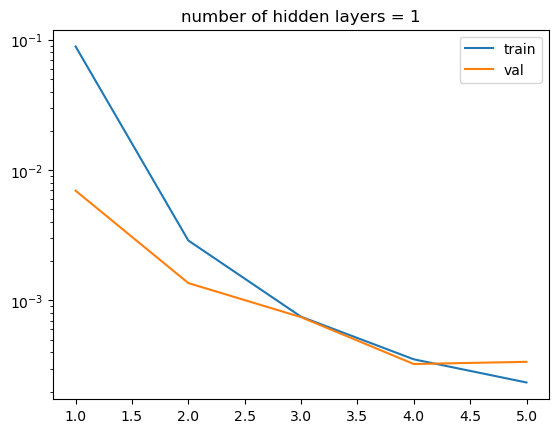

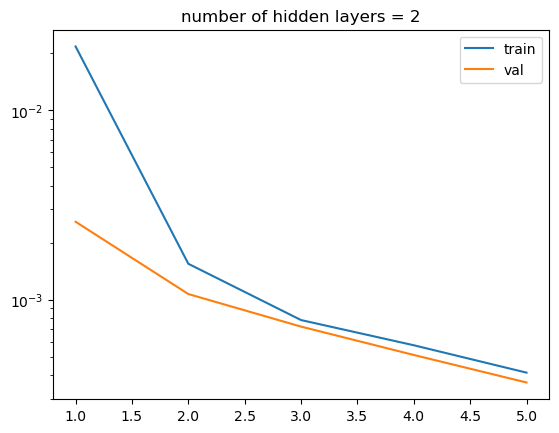

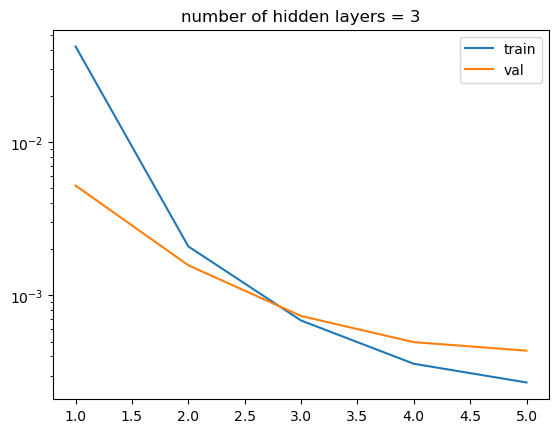

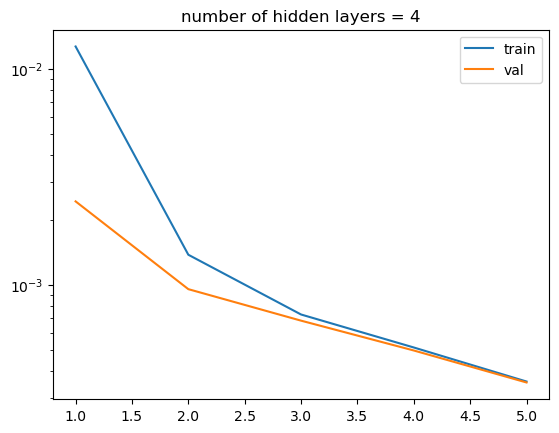

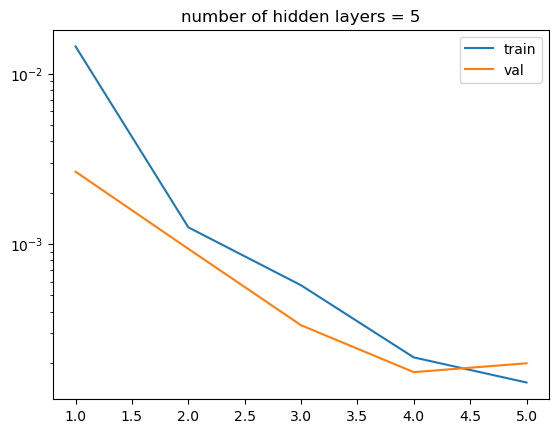

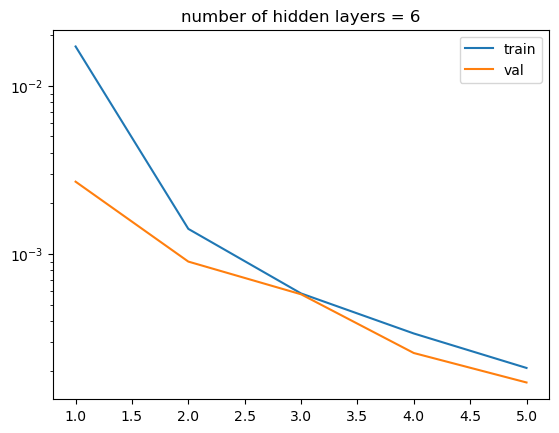

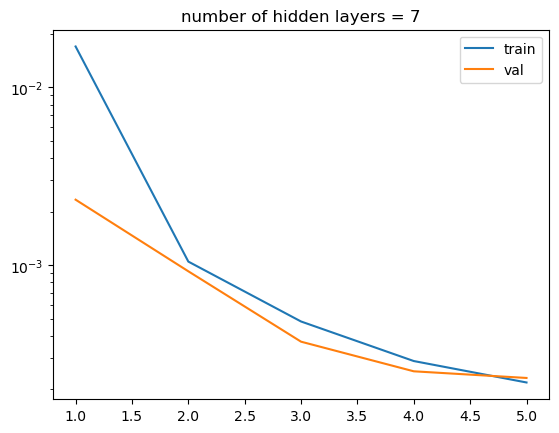

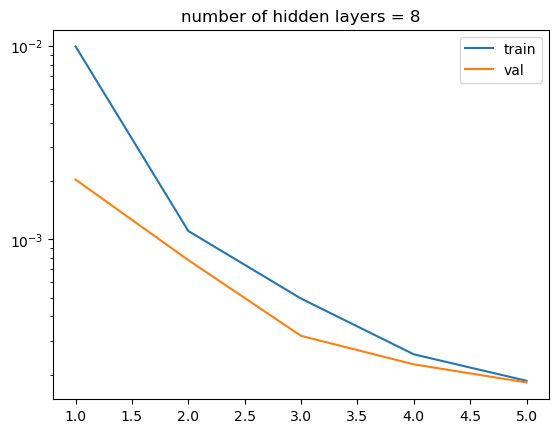

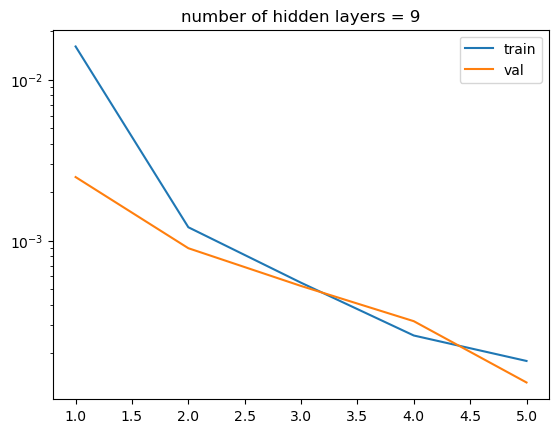

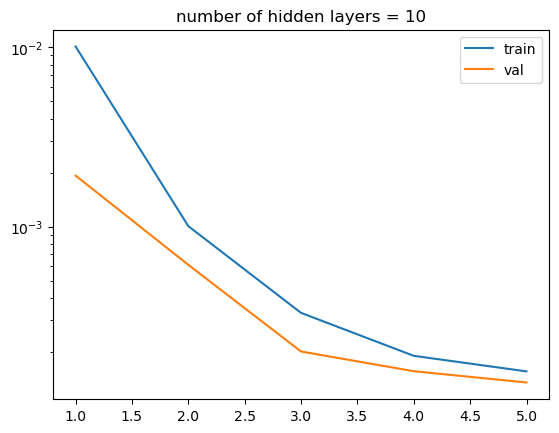

In [14]:
for i in range(1, 11):
    res1 = zip(pd.read_csv(f'savefolderpytorch\\train_ANN_{i}.csv').groupby('epoch').mean()['loss'], pd.read_csv(f'savefolderpytorch\\val_ANN_{i}.csv')['loss'])
    list_object = np.empty(shape=(5, 2))
    for j in range(5):
        list_object[j,:] = next(res1)
    list_object

    x = np.linspace(1, 5, 5)
    train = list_object[:,0]
    val = list_object[:,1]
    plt.semilogy(x, train, label='train')
    plt.semilogy(x, val, label='val')
    plt.title(f"number of hidden layers = {i}")
    plt.legend()
    plt.show()